# **Tweets- Sentiment Analysis**

In today's digital age, textual data is highly prevalent, making the ability to applym **Natural Language Processing (NLP)** techniques more crucial than ever.


This data science project aims to build a robust model capable of analyzing tweets and accurately **assigning sentiment labels**. By leveraging advanced NLP methods, we can transform raw tweet data into meaningful insights, enhancing our understanding of public opinion and trends.








**Data Preprocessing**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


data = pd.read_csv('/content/NL-classification.csv')

In [3]:
import nltk
nltk.download('punkt')
#tokenize data
data["clean"]=data["Text"].apply(lambda x: nltk.word_tokenize(str(x).lower()))

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
import string #load punctuation charachers

#remove stopwords and punctuations
stopwrds = set(stopwords.words('english'))

data["clean"]=data["clean"].apply(lambda x: [y for y in x if (y not in stopwrds)])
data["clean"]=data["clean"].apply(lambda x: [re.sub(r'['+string.punctuation+']','',y) for y in x])
data["clean"]=data["clean"].apply(lambda x: [re.sub('\\n','',y) for y in x])

#clean unneeded spaces or empty columns or non sense words
#training data
data["clean"]=data["clean"].apply(lambda x: [y for y in x if y.strip() != '' and len(y.strip())>2])

data["clean"]=data["clean"].apply(lambda x: ' '.join(x).replace('\\n',''))

#standard packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
# stemming and lemmatizing
nltk.download('wordnet')

from nltk.tokenize import word_tokenize #makes tokens
from nltk.stem import PorterStemmer #word stemming
from nltk.stem import WordNetLemmatizer #lemmatizer
from nltk.corpus import stopwords #remove stopwords

import re ##regular expressions package that allows us to remove punctuation and change capitalization (among other things)
import string ## package that deals with string operations

from textblob import TextBlob # spell correcting plus others (e.g., sentiment)
print("packages imported")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


packages imported


In [4]:
data.head()

,Text,Label,clean
0,I went on a successful date with someone I fel...,affection,went successful date someone felt sympathy con...
1,I was happy when my son got 90% marks in his e...,affection,happy son got marks examination
2,I went to the gym this morning and did yoga.,exercise,went gym morning yoga
3,We had a serious talk with some friends of our...,bonding,serious talk friends flaky lately understood g...
4,I went with grandchildren to butterfly display...,affection,went grandchildren butterfly display crohn con...


In [5]:
data['clean'] = data['clean'].str.replace(r'\d+', '', regex=True)
text_column = data["clean"]

vectorizer = CountVectorizer()
text_vectors = vectorizer.fit_transform(text_column)

print(vectorizer.get_feature_names_out())
print(text_vectors.toarray())

# use bag of words with bigrams
#ngram_range=(min_n,max_n)
vectorizer = CountVectorizer(binary = True, ngram_range=(2,2))
text_vectors = vectorizer.fit_transform(text_column)

print(vectorizer.get_feature_names_out())
print(text_vectors.toarray())


df = pd.DataFrame(data)
unique_labels = df['Label'].unique()

# Create new columns for each unique label and initialize with 0
for label in unique_labels:
    df[label] = 0

# Set 1 where label exists for each row
for idx, row in df.iterrows():
    df.loc[idx, row['Label']] = 1

# Drop the original 'label' column
df.drop(columns=['Label'], inplace=True)

from nltk.stem import WordNetLemmatizer #lemmatizer

## make a function that will lemmatize
## see https://gist.github.com/MaxHalford/68b584e9154098151e6d9b5aa7464948
## so that we can use lemmatization as the method to generate
## the words in the bag of words using CountVectorizer
def lemmatize(text):
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = nltk.word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

# bag of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(tokenizer=lemmatize,binary = True, ngram_range=(1,2))
text_vectors = vectorizer.fit_transform(data["clean"])



['aadhar' 'aagra' 'abandoned' ... 'zootopia' 'zumba' 'zverev']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['aadhar card' 'aagra agra' 'abandoned garage' ... 'zoo yesterday'
 'zumba class' 'zverev rollercoaster']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [7]:
df.head(5)


,Text,clean,affection,exercise,bonding,leisure,achievement,enjoy_the_moment,nature
0,I went on a successful date with someone I fel...,went successful date someone felt sympathy con...,1,0,0,0,0,0,0
1,I was happy when my son got 90% marks in his e...,happy son got marks examination,1,0,0,0,0,0,0
2,I went to the gym this morning and did yoga.,went gym morning yoga,0,1,0,0,0,0,0
3,We had a serious talk with some friends of our...,serious talk friends flaky lately understood g...,0,0,1,0,0,0,0
4,I went with grandchildren to butterfly display...,went grandchildren butterfly display crohn con...,1,0,0,0,0,0,0


In [8]:
print("Affection:", df['affection'].sum())
print("Exercise:", df['exercise'].sum())
print("Bonding:", df['bonding'].sum())
print("Leisure:", df['leisure'].sum())
print("Achievement:", df['achievement'].sum())
print("Enjoy the Moment:", df['enjoy_the_moment'].sum())
print("Nature:", df['nature'].sum())

Affection: 4320
Exercise: 180
Bonding: 1340
Leisure: 900
Achievement: 3849
Enjoy the Moment: 1398
Nature: 277


In [9]:


from sklearn.model_selection import train_test_split

# Generate the SVM classifier for each topic using TITLE only
X_train = text_vectors
Y_train_affection = df["affection"]
Y_train_exercise = df["exercise"]
Y_train_bonding = df["bonding"]
Y_train_leisure = df["leisure"]
Y_train_achievement = df["achievement"]
Y_train_enjoy_the_moment = df["enjoy_the_moment"]
Y_train_nature = df["nature"]

# Split the training set into 70% training and 30% testing
X_train_affection, X_test_affection, y_train_affection, y_test_affection = train_test_split(X_train, Y_train_affection, test_size=0.3, random_state=37)
X_train_exercise, X_test_exercise, y_train_exercise, y_test_exercise = train_test_split(X_train, Y_train_exercise, test_size=0.3, random_state=37)
X_train_bonding, X_test_bonding, y_train_bonding, y_test_bonding = train_test_split(X_train, Y_train_bonding, test_size=0.3, random_state=37)
X_train_leisure, X_test_leisure, y_train_leisure, y_test_leisure = train_test_split(X_train, Y_train_leisure, test_size=0.3, random_state=37)
X_train_achievement, X_test_achievement, y_train_achievement, y_test_achievement = train_test_split(X_train, Y_train_achievement, test_size=0.3, random_state=37)
X_train_enjoy_the_moment, X_test_enjoy_the_moment, y_train_enjoy_the_moment, y_test_enjoy_the_moment = train_test_split(X_train, Y_train_enjoy_the_moment, test_size=0.3, random_state=37)
X_train_nature, X_test_nature, y_train_nature, y_test_nature = train_test_split(X_train, Y_train_nature, test_size=0.3, random_state=37)


In [10]:
from sklearn import svm

SVM_classifier_affection = svm.SVC(kernel='linear')
SVM_classifier_affection.fit(X_train_affection, y_train_affection)

SVM_classifier_exercise = svm.SVC(kernel='linear')
SVM_classifier_exercise.fit(X_train_exercise, y_train_exercise)

SVM_classifier_bonding = svm.SVC(kernel='linear')
SVM_classifier_bonding.fit(X_train_bonding, y_train_bonding)

SVM_classifier_leisure = svm.SVC(kernel='linear')
SVM_classifier_leisure.fit(X_train_leisure, y_train_leisure)

SVM_classifier_achievement = svm.SVC(kernel='linear')
SVM_classifier_achievement.fit(X_train_achievement, y_train_achievement)

SVM_classifier_enjoy_the_moment = svm.SVC(kernel='linear')
SVM_classifier_enjoy_the_moment.fit(X_train_enjoy_the_moment, y_train_enjoy_the_moment)

SVM_classifier_nature = svm.SVC(kernel='linear')
SVM_classifier_nature.fit(X_train_nature, y_train_nature)

SVC(kernel='linear')

In [11]:
y_test_affection_pred = SVM_classifier_affection.predict(X_test_affection)
y_test_exercise_pred = SVM_classifier_exercise.predict(X_test_exercise)
y_test_bonding_pred = SVM_classifier_bonding.predict(X_test_bonding)
y_test_leisure_pred = SVM_classifier_leisure.predict(X_test_leisure)
y_test_achievement_pred = SVM_classifier_achievement.predict(X_test_achievement)
y_test_enjoy_the_moment_pred = SVM_classifier_enjoy_the_moment.predict(X_test_enjoy_the_moment)
y_test_nature_pred = SVM_classifier_nature.predict(X_test_nature)

In [12]:
from sklearn import metrics

y_test_affection_pred = SVM_classifier_affection.predict(X_test_affection)
y_test_exercise_pred = SVM_classifier_exercise.predict(X_test_exercise)
y_test_bonding_pred = SVM_classifier_bonding.predict(X_test_bonding)
y_test_leisure_pred = SVM_classifier_leisure.predict(X_test_leisure)
y_test_achievement_pred = SVM_classifier_achievement.predict(X_test_achievement)
y_test_enjoy_the_moment_pred = SVM_classifier_enjoy_the_moment.predict(X_test_enjoy_the_moment)
y_test_nature_pred = SVM_classifier_nature.predict(X_test_nature)

# Confusion matrices for each topic classification
C_affection = metrics.confusion_matrix(y_test_affection, y_test_affection_pred)
C_exercise = metrics.confusion_matrix(y_test_exercise, y_test_exercise_pred)
C_bonding = metrics.confusion_matrix(y_test_bonding, y_test_bonding_pred)
C_leisure = metrics.confusion_matrix(y_test_leisure, y_test_leisure_pred)
C_achievement = metrics.confusion_matrix(y_test_achievement, y_test_achievement_pred)
C_enjoy_the_moment = metrics.confusion_matrix(y_test_enjoy_the_moment, y_test_enjoy_the_moment_pred)
C_nature = metrics.confusion_matrix(y_test_nature, y_test_nature_pred)

# Print evaluation metrics
print("Model Accuracy Affection:", metrics.accuracy_score(y_test_affection, y_test_affection_pred))
print("Precision Affection:", metrics.precision_score(y_test_affection, y_test_affection_pred))
print("Recall Affection:", metrics.recall_score(y_test_affection, y_test_affection_pred))
print(C_affection)

print("Model Accuracy Exercise:", metrics.accuracy_score(y_test_exercise, y_test_exercise_pred))
print("Precision Exercise:", metrics.precision_score(y_test_exercise, y_test_exercise_pred))
print("Recall Exercise:", metrics.recall_score(y_test_exercise, y_test_exercise_pred))
print(C_exercise)

print("Model Accuracy Bonding:", metrics.accuracy_score(y_test_bonding, y_test_bonding_pred))
print("Precision Bonding:", metrics.precision_score(y_test_bonding, y_test_bonding_pred))
print("Recall Bonding:", metrics.recall_score(y_test_bonding, y_test_bonding_pred))
print(C_bonding)

print("Model Accuracy Leisure:", metrics.accuracy_score(y_test_leisure, y_test_leisure_pred))
print("Precision Leisure:", metrics.precision_score(y_test_leisure, y_test_leisure_pred))
print("Recall Leisure:", metrics.recall_score(y_test_leisure, y_test_leisure_pred))
print(C_leisure)

print("Model Accuracy Achievement:", metrics.accuracy_score(y_test_achievement, y_test_achievement_pred))
print("Precision Achievement:", metrics.precision_score(y_test_achievement, y_test_achievement_pred))
print("Recall Achievement:", metrics.recall_score(y_test_achievement, y_test_achievement_pred))
print(C_achievement)

print("Model Accuracy Enjoy the Moment:", metrics.accuracy_score(y_test_enjoy_the_moment, y_test_enjoy_the_moment_pred))
print("Precision Enjoy the Moment:", metrics.precision_score(y_test_enjoy_the_moment, y_test_enjoy_the_moment_pred))
print("Recall Enjoy the Moment:", metrics.recall_score(y_test_enjoy_the_moment, y_test_enjoy_the_moment_pred))
print(C_enjoy_the_moment)

print("Model Accuracy Nature:", metrics.accuracy_score(y_test_nature, y_test_nature_pred))
print("Precision Nature:", metrics.precision_score(y_test_nature, y_test_nature_pred))
print("Recall Nature:", metrics.recall_score(y_test_nature, y_test_nature_pred))
print(C_nature)


Model Accuracy Affection: 0.9470108695652174
Precision Affection: 0.9387121799844841
Recall Affection: 0.9125188536953243
[[2275   79]
 [ 116 1210]]
Model Accuracy Exercise: 0.9926630434782608
Precision Exercise: 0.7090909090909091
Recall Exercise: 0.78
[[3614   16]
 [  11   39]]
Model Accuracy Bonding: 0.9777173913043479
Precision Bonding: 0.9002375296912114
Recall Bonding: 0.9045346062052506
[[3219   42]
 [  40  379]]
Model Accuracy Leisure: 0.9608695652173913
Precision Leisure: 0.7702702702702703
Recall Leisure: 0.6477272727272727
[[3365   51]
 [  93  171]]
Model Accuracy Achievement: 0.902445652173913
Precision Achievement: 0.8634686346863468
Recall Achievement: 0.8160418482999128
[[2385  148]
 [ 211  936]]
Model Accuracy Enjoy the Moment: 0.9282608695652174
Precision Enjoy the Moment: 0.7191780821917808
Recall Enjoy the Moment: 0.5357142857142857
[[3206   82]
 [ 182  210]]
Model Accuracy Nature: 0.9861413043478261
Precision Nature: 0.7818181818181819
Recall Nature: 0.5243902439024

In [13]:
## install the package for upset plot
## this way we can visualize the classification on the training set
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24815 sha256=e7012737248c0574d9576027e00e0c624a0579f9bc1dd5db58a78afa8506a15b
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


In [14]:
from upsetplot import UpSet
from upsetplot import plot
from upsetplot import generate_counts
from upsetplot import from_memberships

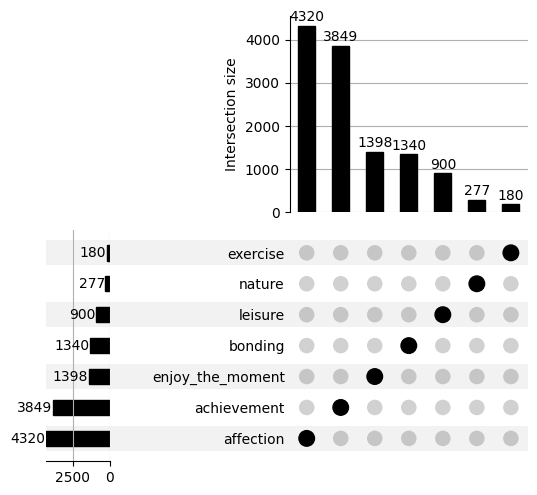

In [15]:
# Need to put data into a dataframe for UpSet plot to read
total = np.transpose(np.array([Y_train_affection, Y_train_exercise, Y_train_bonding, Y_train_leisure, Y_train_achievement, Y_train_enjoy_the_moment, Y_train_nature]))

total_df = pd.DataFrame(total, columns=['affection', 'exercise', 'bonding', 'leisure', 'achievement', 'enjoy_the_moment', 'nature'])

# Need to now count the number of items in each portion of the venn diagram
labels = list(total_df.columns)
total_bool = total_df[labels].astype(bool)
total_bool = pd.concat([total_bool, total_df[[col for col in total_df.columns if col not in labels]]], axis=1).set_index(labels)
total_bool.head(2)

# Plot the upset plot
upset = UpSet(total_bool, subset_size="count", show_counts=True)
upset.plot()
plt.show()

In [16]:
# Predict using the test data variables from the initial split
y_test_affection_predicted_new = SVM_classifier_affection.predict(X_test_affection)

y_test_exercise_predicted_new = SVM_classifier_exercise.predict(X_test_exercise)

y_test_bonding_predicted_new = SVM_classifier_bonding.predict(X_test_bonding)

y_test_leisure_predicted_new = SVM_classifier_leisure.predict(X_test_leisure)

y_test_achievement_predicted_new = SVM_classifier_achievement.predict(X_test_achievement)

y_test_enjoy_the_moment_predicted_new = SVM_classifier_enjoy_the_moment.predict(X_test_enjoy_the_moment)

y_test_nature_predicted_new = SVM_classifier_nature.predict(X_test_nature)


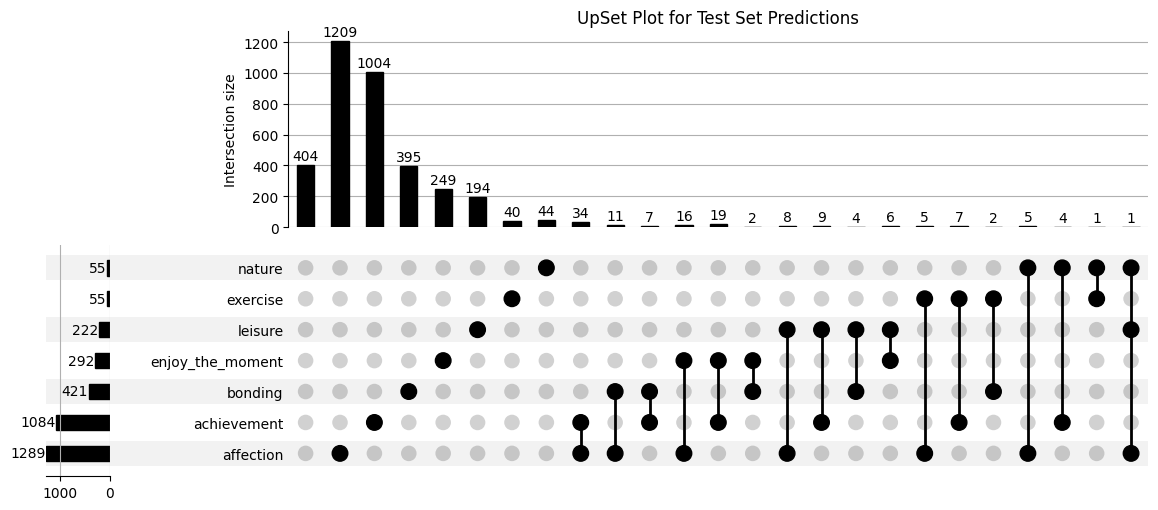

In [17]:
total = np.transpose(np.array([y_test_affection_predicted_new, y_test_exercise_predicted_new,
                               y_test_bonding_predicted_new, y_test_leisure_predicted_new,
                               y_test_achievement_predicted_new, y_test_enjoy_the_moment_predicted_new,
                               y_test_nature_predicted_new]))

total_df = pd.DataFrame(total, columns=['affection', 'exercise', 'bonding', 'leisure',
                                        'achievement', 'enjoy_the_moment', 'nature'])

## need to now count the number of items in each portion of the venn diagram
labels = list(total_df.columns)
total_bool = total_df[labels].astype(bool)
total_bool = pd.concat([total_bool, total_df[[col for col in total_df.columns if col not in labels]]], axis=1).set_index(labels)

## plot the upset plot
upset = UpSet(total_bool, subset_size="count", show_counts=True)
upset.plot()
plt.title('UpSet Plot for Test Set Predictions')
plt.show()